In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


def poly(x, coef):
    """ function to approximate by polynomial interpolation"""
    return 7


def get_attribute(model, X):    
    return model.steps[0][1].transform(X)


def get_coeff(model):
    return model.steps[1][1].coef_


def get_future_name(model):
    return model.steps[0][1].get_feature_names()

In [15]:
# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
x = np.random.sample((100))
# x = x/x.max(axis=0)

print(x.shape)

rng = np.random.RandomState(0)
# rng.shuffle(x)
x = x[:90]
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
print(X)

# X_plot = X_plot/X_plot.max(axis=0)
# # print(X_plot)
# x_test = x_test[:, np.newaxis]
# y_test = f(x_test)
# print(y_test)

(100,)
[[  7.59580412e-01]
 [  1.49693975e-01]
 [  4.67804735e-01]
 [  1.20309716e-01]
 [  7.26273644e-01]
 [  9.68546295e-01]
 [  4.81787940e-01]
 [  9.96017426e-01]
 [  7.19789120e-01]
 [  5.98392878e-01]
 [  9.28208961e-01]
 [  3.90086028e-01]
 [  9.20847923e-01]
 [  8.65385516e-01]
 [  1.58298327e-01]
 [  1.14453275e-01]
 [  7.93533350e-01]
 [  7.94165461e-01]
 [  4.14145373e-01]
 [  7.51687949e-04]
 [  1.20547015e-01]
 [  2.38492100e-01]
 [  2.51019128e-02]
 [  3.85767084e-02]
 [  9.34810897e-01]
 [  7.99886785e-01]
 [  1.47784565e-01]
 [  4.59384552e-01]
 [  4.61713665e-01]
 [  4.58040967e-01]
 [  1.76862348e-02]
 [  7.30162615e-01]
 [  4.88315732e-01]
 [  2.79098426e-01]
 [  6.19339767e-01]
 [  5.72079419e-01]
 [  6.04287053e-01]
 [  1.33305169e-02]
 [  8.52965764e-01]
 [  3.14876289e-01]
 [  5.92312243e-02]
 [  1.68990047e-01]
 [  9.28016508e-01]
 [  1.10246102e-01]
 [  2.12282601e-01]
 [  6.10707759e-01]
 [  4.92730716e-01]
 [  8.99935434e-01]
 [  4.30439242e-02]
 [  8.3614034

In [23]:
# Searchin attribute
degree = 8

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

coef = get_coeff(model)
attr = get_attribute(model, X)

decomposition = coef*attr

number_of_training_point = decomposition.shape[0]
number_of_attribute = decomposition.shape[1]

y_ = [v.sum() for v in decomposition]
print(y_)
# print(y)

[0.52306017570597341, 0.022324691201272829, 0.21094623827271894, 0.014439534815507667, 0.48230977561187327, 0.7981432268372558, 0.22324334602173551, 0.83596989887598561, 0.47450378639442697, 0.3370838809094156, 0.74307574567404033, 0.14833722684433506, 0.73310086529390162, 0.6588571680059192, 0.024953837554143619, 0.01307097099927977, 0.56565895252687848, 0.5664614998602947, 0.16665528678028954, 5.6502389115676033e-07, 0.014496413761072901, 0.056340819407138365, 0.00063003966803879365, 0.001487793155336227, 0.75204299931174734, 0.57374056075630853, 0.021760864766610873, 0.20368952475186014, 0.2056855831400628, 0.2025419867635613, 0.00031278643066422353, 0.48701174900534339, 0.22908802028863826, 0.076888566892931887, 0.3595253010493632, 0.3097132396984304, 0.34334111691979147, 0.0001776972782640023, 0.64248319977231561, 0.097516822609580306, 0.0035062867246206638, 0.028421906552966, 0.74281463446900298, 0.012129597133491021, 0.044726205079238503, 0.35020879465088844, 0.23307815047220271

In [24]:
# Transform test data
x_test = x[10]
y_test = f(x_test)

test_attr = get_attribute(model, x_test)
# test_attr[0][1]

# dec = coef*test_attr
# print(dec.shape)
# y__ = [dec[v].sum() for v in range(dec.shape[0])]
# y__

y_test      0.743075745751
y_predict   0.500905846588


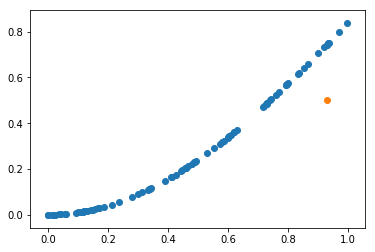

In [25]:
# Training PNN
sigma = 0.9

temp_sum = np.zeros(number_of_training_point)
numerator = np.zeros(number_of_training_point)

for tp_i in range(number_of_training_point):
    temp_attr = np.zeros(number_of_attribute)
    
    for atr_i in range(number_of_attribute):        
        temp_attr[atr_i] = (test_attr[0][atr_i] - attr[tp_i][atr_i])**2
        
    temp_sum[tp_i] = exp( -temp_attr.sum() / ( 2*(sigma**2) ) )
#     print(temp_sum)
    numerator[tp_i] = y_[tp_i]*temp_sum[tp_i]
    
_y_ = numerator.sum()/temp_sum.sum()

print('y_test     ', y_test)
print('y_predict  ', _y_)

# plt.scatter(X, y)
plt.scatter(X, y_)
plt.scatter(x_test, _y_)
plt.show()

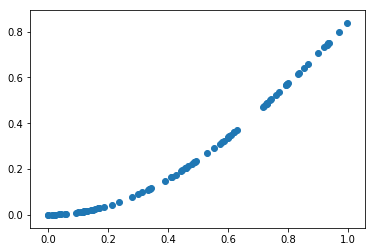

In [26]:
plt.scatter(X, y)
# plt.plot(X, y_)
# plt.scatter(x_test, _y_)
plt.show()

In [ ]:
t_a = np.zeros(number_of_attribute)

# t_a = t_a**2
# t_a.sum()
t_a.shape